In [1]:
##############################################################
#                                                            #
#    Mark Hoogendoorn and Burkhardt Funk (2017)              #
#    Machine Learning for the Quantified Self                #
#    Springer                                                #
#    Chapter 8                                               #
#                                                            #
##############################################################

from util.VisualizeDataset import VisualizeDataset
from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.Evaluation import RegressionEvaluation
from Chapter8.LearningAlgorithmsTemporal import TemporalClassificationAlgorithms
from Chapter8.LearningAlgorithmsTemporal import TemporalRegressionAlgorithms
from statsmodels.tsa.stattools import adfuller
from pandas.tools.plotting import autocorrelation_plot

import copy
import pandas as pd
from util import util
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split


# Of course we repeat some stuff from Chapter 3, namely to load the dataset

DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = './intermediate_datafiles/'

try:
    dataset = pd.read_csv(dataset_path + 'chapter5_result.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

dataset.loc[dataset['column_name'] == some_value]
dataset.index = dataset.index.to_datetime()

# Let us consider our second task, namely the prediction of the heart rate. We consider this as a temporal task.

prepare = PrepareDatasetForLearning()

train_X, test_X, train_y, test_y = prepare.split_single_dataset_regression_by_time(dataset, 'hr_watch_rate', '2016-02-08 18:29:56',
#                                                                                   '2016-02-08 18:29:58','2016-02-08 18:29:59')
                                                                                   '2016-02-08 19:34:07', '2016-02-08 20:07:50')

print 'Training set length is: ', len(train_X.index)
print 'Test set length is: ', len(test_X.index)

# Select subsets of the features that we will consider:

print 'Training set length is: ', len(train_X.index)
print 'Test set length is: ', len(test_X.index)

# Select subsets of the features that we will consider:

basic_features = ['acc_phone_x','acc_phone_y','acc_phone_z','acc_watch_x','acc_watch_y','acc_watch_z','gyr_phone_x','gyr_phone_y','gyr_phone_z','gyr_watch_x','gyr_watch_y','gyr_watch_z',
                  'labelOnTable','labelSitting','labelWashingHands','labelWalking','labelStanding','labelDriving','labelEating','labelRunning',
                  'light_phone_lux','mag_phone_x','mag_phone_y','mag_phone_z','mag_watch_x','mag_watch_y','mag_watch_z','press_phone_pressure']
pca_features = ['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7']
time_features = [name for name in dataset.columns if ('temp_' in name and not 'hr_watch' in name)]
freq_features = [name for name in dataset.columns if (('_freq' in name) or ('_pse' in name))]
print '#basic features: ', len(basic_features)
print '#PCA features: ', len(pca_features)
print '#time features: ', len(time_features)
print '#frequency features: ', len(freq_features)
cluster_features = ['cluster']
print '#cluster features: ', len(cluster_features)
features_after_chapter_3 = list(set().union(basic_features, pca_features))
features_after_chapter_4 = list(set().union(basic_features, pca_features, time_features, freq_features))
features_after_chapter_5 = list(set().union(basic_features, pca_features, time_features, freq_features, cluster_features))

selected_features = ['temp_pattern_labelOnTable','labelOnTable', 'temp_pattern_labelOnTable(b)labelOnTable', 'cluster',
                     'pca_1_temp_mean_ws_120','pca_2_temp_mean_ws_120','pca_2','acc_watch_y_temp_mean_ws_120','gyr_watch_y_pse',
                     'gyr_watch_x_pse']
possible_feature_sets = [basic_features, features_after_chapter_3, features_after_chapter_4, features_after_chapter_5, selected_features]
feature_names = ['initial set', 'Chapter 3', 'Chapter 4', 'Chapter 5', 'Selected features']

# Let us first study whether the time series is stationary and what the autocorrelations are.

dftest = adfuller(dataset['hr_watch_rate'], autolag='AIC')
print dftest

autocorrelation_plot(dataset['hr_watch_rate'])
plot.show()


Training set length is:  1401
Test set length is:  736
Training set length is:  1401
Test set length is:  736
#basic features:  28
#PCA features:  7
#time features:  71
#frequency features:  432
#cluster features:  1
(-3.2755567605870031, 0.016007075461294432, 1L, 2893L, {'5%': -2.8625395742539688, '1%': -3.4326123960498429, '10%': -2.5673021019579663}, 13996.789178009014)


In [19]:

possible_feature_sets = [basic_features]
feature_names = ['basic_features']

#In assignment 8.6.2.3 you are asked to develop a simple dynamical systems model to predict the heart rate based on 
#certain features of the crowdsignals dataset. Here is an example of how you can create such a model 
#using code from chapter 8:

selected_train_X = train_X[possible_feature_sets[0]]
selected_test_X = test_X[possible_feature_sets[0]]
# a list of columns the model addresses (i.e. the states), the string should be preceded by 'self.' in order for the             approach to work.
# a list of equations to derive the specified states, again using 'self.' preceding all parameters and columns                   names.
# a list of targets (a subset of the columns) (again with 'self.')
# a list of parameters in the equations (again with 'self.')
columns = ['self.acc_watch_x', 'self.acc_watch_y', 'self.hr_watch_rate']
equations = ['self.hr_watch_rate * self.acc_watch_x',
'self.b * self.hr_watch_rate',
'self.b * self.acc_watch_y']
targets = ['self.hr_watch_rate']
parameters = ['self.b']

train_y_frame = train_y.to_frame(name='hr_watch_rate')
test_y_frame = test_y.to_frame(name='hr_watch_rate')


output_sets1 = learner.dynamical_systems_model_nsga_2( selected_train_X,                                           
     train_y_frame,
     selected_test_X,
     test_y_frame,
     columns, equations, targets, parameters)
        
        

     

---- 0
---- 1


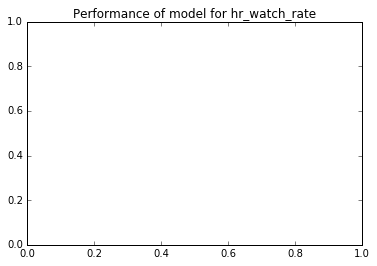

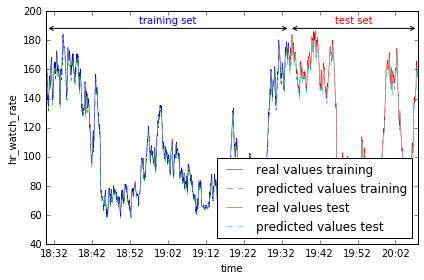

In [33]:
DataViz.plot_numerical_prediction_versus_real_dynsys_mo(selected_train_X.index, 
train_y_frame, selected_test_X.index, test_y_frame, output_sets1, 0, 'hr_watch_rate')


In [44]:
selected_train_X = train_X[possible_feature_sets[0]]
selected_test_X = test_X[possible_feature_sets[0]]
# a list of columns the model addresses (i.e. the states), the string should be preceded by 'self.' in order for the             approach to work.
# a list of equations to derive the specified states, again using 'self.' preceding all parameters and columns                   names.
# a list of targets (a subset of the columns) (again with 'self.')
# a list of parameters in the equations (again with 'self.')
columns = ['self.acc_watch_x', 'self.acc_watch_y', 'self.acc_watch_z', 'self.hr_watch_rate']
equations = ['(self.acc_watch_x * self.a + self.acc_watch_y * self.b + self.acc_watch_z * self.c ) / 3',
'self.a * self.acc_watch_x',
'self.b * self.acc_watch_y',
'self.c * self.acc_watch_z']
targets = ['self.hr_watch_rate']
parameters = ['self.a','self.b','self.c']



output_sets = learner.dynamical_systems_model_ga( selected_train_X,                                      
                                                 train_y_frame,
                                                 selected_test_X,
                                                 test_y_frame,
                                                 columns, 
                                                 equations, 
                                                 targets, 
                                                 parameters,
                                                 max_generations=10, 
                                                 per_time_step=True)

DataViz.plot_numerical_prediction_versus_real_dynsys_mo(selected_train_X.index, 
train_y_frame, selected_test_X.index, test_y_frame, output_sets, 0, 'hr_watch_rate')


KeyError: 0

In [60]:
DataViz.plot_numerical_prediction_versus_real_dynsys_mo(selected_train_X.index, 
train_y_frame, selected_test_X.index, test_y_frame, output_sets, 0, 'hr_watch_rate')

KeyError: 0

In [64]:

output_sets

(      hr_watch_rate
 0        162.000000
 1          1.735374
 2          1.737828
 3          1.739562
 4          1.739863
 5          1.741285
 6          1.739581
 7          1.741250
 8          1.741511
 9          1.739184
 10         1.738903
 11         1.738874
 12         1.739193
 13         1.738530
 14         1.739683
 15         1.739174
 16         1.738541
 17         1.740747
 18         1.737219
 19         1.739541
 20         1.740528
 21         1.738204
 22         1.739529
 23         1.737810
 24         1.740994
 25         1.738652
 26         1.739374
 27         1.739568
 28         1.740085
 29         1.740427
 ...             ...
 1371      -0.234142
 1372      -2.039542
 1373       0.712606
 1374      -1.312591
 1375      -0.138384
 1376       0.336603
 1377       0.705714
 1378       0.151367
 1379      -1.509889
 1380       1.150934
 1381      -1.160133
 1382       0.353384
 1383       0.339089
 1384      -1.678435
 1385       0.968201
 1386       1